In [1]:
import tensorflow as tf
import edward as ed
import numpy as np
import seaborn as sns
import pandas as pd

from edward.models import Normal

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn')

In [57]:
x = np.linspace(0, 10, 200)
neuron1 = np.sin(0.5*x)
neuron2 = np.sin(0.7*x + 0.2)
upneuron = np.sin(0.4*x)
data = upneuron
target = [neuron1, neuron2]

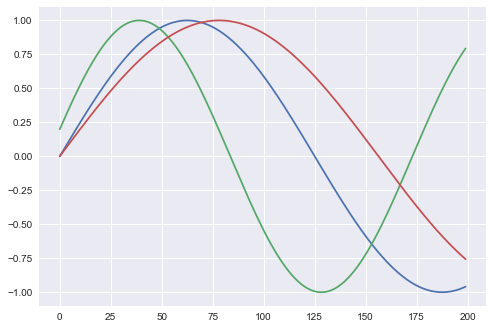

In [58]:
plt.plot(neuron1)
plt.plot(neuron2)
plt.plot(upneuron)

In [59]:
X = tf.placeholder(tf.float32, shape=[2, len(x)])

A = Normal(loc=0.5*tf.ones([1,2]), scale=tf.ones([1, 2]))
b = Normal(loc=0.5, scale=tf.ones(1))

y = tf.matmul(A, X) + b

qA = Normal(loc=tf.Variable(0.5*tf.ones([1, 2])), 
           scale=tf.Variable(tf.nn.softplus(tf.ones([1, 2]))))

qb = Normal(loc=tf.Variable(0.5),
           scale=tf.Variable(tf.nn.softplus(tf.ones(1))))

In [60]:
latent_vars = {
    A: qA,
    b: qb
}

In [50]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()

In [61]:
inference = ed.inferences.KLqp(latent_vars, data={X: data, y: target})
inference.run(n_samples=10, n_iter=200)

TypeError: Key-value pair in data does not have same shape: (1, 200), (2, 200)

In [44]:
tf.matmul(A, X)

<tf.Tensor 'MatMul_10:0' shape=(1, 200) dtype=float32>

In [43]:
A, X

(<ed.RandomVariable 'Normal_15/' shape=(1, 2) dtype=float32>,
 <tf.Tensor 'Placeholder_6:0' shape=(2, 200) dtype=float32>)

In [54]:
data[0].shape

(200,)

In [56]:
data

[array([ 0.        ,  0.02009915,  0.04019018,  0.06026497,  0.08031541,
         0.10033341,  0.12031086,  0.14023971,  0.16011191,  0.17991941,
         0.19965422,  0.21930837,  0.23887392,  0.25834295,  0.27770761,
         0.29696008,  0.31609256,  0.33509734,  0.35396674,  0.37269312,
         0.39126893,  0.40968667,  0.42793888,  0.4460182 ,  0.46391732,
         0.481629  ,  0.49914611,  0.51646155,  0.53356833,  0.55045954,
         0.56712835,  0.58356804,  0.59977195,  0.61573355,  0.63144638,
         0.6469041 ,  0.66210045,  0.67702931,  0.69168463,  0.70606051,
         0.72015112,  0.73395078,  0.74745391,  0.76065506,  0.77354889,
         0.78613019,  0.79839388,  0.81033501,  0.82194875,  0.83323041,
         0.84417544,  0.8547794 ,  0.86503801,  0.87494714,  0.88450277,
         0.89370105,  0.90253826,  0.91101082,  0.91911533,  0.92684849,
         0.9342072 ,  0.94118847,  0.94778948,  0.95400757,  0.95984023,
         0.96528509,  0.97033997,  0.97500281,  0.9